# Homework 3

DUE DEC 1st at 11:59 PM


Jack Holbrook, CMPSC 190DD, 12/4/2020

## Problem 1

In this problem, you will implement a simple feed-forward neural network using PyTorch, a straight-forward and simple-to-pickup framework for quickly prototyping deep learning model. 

PyTorch provides 2 powerful things. First, a nice data structure called Tensor (basically a matrix, similar to Numpy ndarray). Tensor is optimized for matrix calculation and can be loaded to a GPU. Tensor is also implemented so that it's easy to calculate and pass back chains of gradients, which is extremely useful for backpropagation on neural network. Second, a nice inner mechanism called Autograd that nicely map variables involved a chain of calculations and efficiently calculate their gradients via the chain rule when needed. Read more here: https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95  

You will train and evaluate the model on a simple dataset for classifying seeds. The dataset has 7 features and 3 labels. Refer to the example from the discussion session if needed. 

**In this problem, you are given a good amount of freedom in tweaking your choices in designing the network. As long as it's still a feed-forward network, it's fine. Accuracy does not matter as long as it's reasonable (like above 80%) but do try to achieve a high accuracy.**

(Optional): the dataset provided to you is very simple. Instead, you can challenge yourself by trying more difficult datasets. Some datasets that you can loaded directly using PyTorch:
- MNIST (Most famous dataset for getting into Deep Learning)
- Fashion-MNIST
- Kuzushiji-MNIST 

The datasets are available at https://pytorch.org/docs/stable/torchvision/datasets.html. You will get the same grade no matter what dataset you use. 

### Part a
Firstly, load and inspect the dataset from "seeds_dataset.csv". Split them into a train set (90%) and a test set (10%). You should be quite comfortable with these operations by now. 

In [118]:
#!pip3 install visdom
from sklearn.model_selection import train_test_split

In [119]:
#!pip3 install torchvision
import numpy as np

In [120]:
# may be more useful to use MNIST 
# there are tons of MNIST implementations online using pytorch. 

# imports the necessary libraries for this activity. 
import pandas as pd
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# these are the set hyperparameters. 
# from the medium article, update these as necessary.

input_size = 784       # The image size = 28 x 28 = 784
hidden_size = 500      # The number of nodes at the hidden layer
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 100       # The size of input data took for one iteration
learning_rate = 0.001  # The speed of convergence

'''
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())
                           '''

seeds = pd.read_csv("seeds_dataset.csv", header = None)
seeds   # labels come in values either 1,2 or 3. 


X = seeds.iloc[:,:-1].to_numpy(dtype=np.float32)
y = seeds.iloc[:,-1].astype("category").cat.codes.to_numpy(dtype=np.float32)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.1, random_state = 0)


### Part b 
Create a Python class for our neural network model. The network should have 1 input layer, at least 1 hidden layer, and 1 output layer. You are free to choose the size and the number of hidden layers (it may affect the performance so try tweaking around a bit), and the activation function (or no activation at all).

Some popular activation functions that you can try:
- Sigmoid (torch.sigmoid)
- ReLU (torch.relu)
- Tanh (torch.tanh)

In [121]:
class anetwork(nn.Module):   # this may be shortened to nn.module
    def __init__(self):    #self, input_size, hidden_size, num_classes):
        super(anetwork, self).__init__()
        # well define the layers in the networl
        self.fc1  = nn.Linear(in_features = 7,  out_features = 21) 
        self.fc2  = nn.Linear(in_features = 21, out_features = 21) 
        self.out  = nn.Linear(in_features = 21, out_features = 3) 
                                                               # find out the dimensions of the seed data
    # Create the network class by filling in this block of code
    
    def forward (self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.out(x)
        return x

In [122]:
import math

In [123]:
from sklearn.utils import shuffle

### Part c 
Train the network using the train dataset. You are free to choose any suitable optimizer and loss function provided by PyTorch (or you can just use SGD optimizer and CrossEntropyLoss like we did in the discussion session for simplicity). After each epoch, record the current loss and the current accuracy. The current accuracy is obtained by evaluating the model on the train dataset. 

Some optimizers that you can try:
- SGD
- Adagrad
- Adam

https://pytorch.org/docs/stable/optim.html

In [126]:
LEARNING_RATE = 0.01
EPOCHS = 30
batch_size = 32
loss_values = []

def my_plot(epochs, loss):
    plt.plot(epochs, loss)

network = anetwork()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate) 
#  ^^^  Named SGD but actually mini-batch Gradient Descent

# Set network in training mode
network.train()

training_size = len(xTrain)
num_batches = math.ceil(training_size/batch_size)

# start on outer for loop 
for epoch in range(EPOCHS):
    running_loss = 0.0
   
    
    #shuffles the data
    xTrain, yTrain = shuffle(xTrain, yTrain)
    
    
    
    for batch in range(num_batches):
    
        xTrain_batch = torch.tensor(xTrain[batch*batch_size:min(batch*batch_size+batch_size,training_size),:])
        yTrain_batch = torch.tensor(yTrain[batch*batch_size:min(batch*batch_size+batch_size,training_size)], dtype=torch.long)
    
        optimizer.zero_grad()
        
        output = network(xTrain_batch)
        
        # the working part of the loss in the optimizer
        loss = criterion(output,yTrain_batch)
        loss.backward()
        optimizer.step()
        
        loss_values.append(loss.item())
        #running_loss +=
        #running_loss = loss.item()
        #running_loss = running_loss / num_batches
    
    # ongoing list appends item running loss
        
    
    if (epoch % 10) == 0:
        print("Epoch:", epoch, "Current loss: ", loss.item())
    
    # Train the network by filling in this block of code

Epoch: 0 Current loss:  1.9673489332199097
Epoch: 10 Current loss:  1.0624501705169678
Epoch: 20 Current loss:  1.08342707157135


/home/jackholbrook/.local/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


In [127]:
loss_values
# yes this list is appended to acorrectly. 

[1.9331880807876587,
 1.756152868270874,
 1.6602013111114502,
 1.742323637008667,
 1.565213918685913,
 1.9673489332199097,
 1.4743306636810303,
 1.841475248336792,
 1.6199182271957397,
 1.521172285079956,
 1.6065521240234375,
 1.4824113845825195,
 1.675431251525879,
 1.3529995679855347,
 1.4634701013565063,
 1.3880690336227417,
 1.5382986068725586,
 1.4612597227096558,
 1.4460188150405884,
 1.2943024635314941,
 1.1915125846862793,
 1.656498908996582,
 1.498468041419983,
 1.3079137802124023,
 1.4516595602035522,
 1.4628218412399292,
 1.2708171606063843,
 1.2027703523635864,
 1.3977022171020508,
 1.2567814588546753,
 1.3376449346542358,
 1.3420437574386597,
 1.277121901512146,
 1.3492498397827148,
 1.369077444076538,
 1.0856949090957642,
 1.4011825323104858,
 1.122260332107544,
 1.2307751178741455,
 1.3214828968048096,
 1.1753978729248047,
 1.3184094429016113,
 1.1908135414123535,
 1.2306495904922485,
 1.2733104228973389,
 1.250016212463379,
 1.1512643098831177,
 1.2944831848144531,
 1.1

Plot how the loss and the accuracy change over the epochs. 

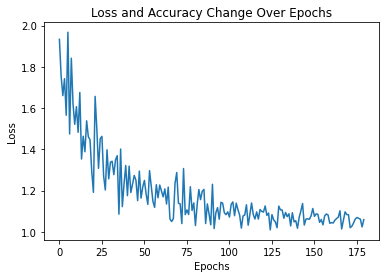

In [134]:
import matplotlib.pyplot as plt
# plot the loss
plt.title("Loss and Accuracy Change Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.array(loss_values))

### Part d 
Evaluate the model on the test dataset. Print out the accuracy. Does this accuracy agrees with the training accuracy showed on the plot? Why may they be different?

In [135]:
# this is supposed to work alright

network.eval()

pred = torch.argmax(network(torch.tensor(xTest)), dim=1).numpy()

print("Accuracy: ", np.sum(pred == yTest)/len(yTest))

# this may not have been a very accurate model. 

Accuracy:  0.3333333333333333


## Problem 2

If you haven't done so already, please read Chapter 2 (on fairness) of the textbook.

### Part a

Import the 'semi_synthetic.csv' dataset. This dataset is a modified version of the UCI Credit card dataset (details [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)). We added a new synthetic feature to this dataset called `LIMIT_BAL`. It is highly predictive for `SEX==2` but not at all for `SEX==1`. As it turns out, this causes issues with fairness where models rely too much on `LIMIT_BAL` and discriminate against `SEX==2`. We will try to mitigate this in terms of the fairness criterion 'Statistical Parity' as it's mentioned in the textbook.

In [1]:
# load in a new data set for the next problem
import pandas as pd

credit = pd.read_csv("semi_synthetic.csv")
credit   # labels come in values either 1 or 0 for either defaulting or not

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.897646,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,1.239472,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,-0.259719,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,-0.277865,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,-0.257674,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.714882,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,0.314780,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,-0.930758,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,-0.087740,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Extract features from the dataset (all columns except last) and call it `X`. Extract last column and call it `Y`. Also extract the `SEX` column and call this `SF` (for sensitive feature). Split all of these arrays data into train and test sets. You can use `sklearn.model_selection.train_test_split` and 20% ratio for the test dataset. Pass `stratify=Y` to `train_test_split` if you're using it. This ensures that both test and train datasets have the same ratio of 0/1 labels.

In [2]:
from sklearn.model_selection import train_test_split 
import numpy as np
import random
random.seed(2020)
np.random.seed(2020)

X = credit.iloc[:, 0:23]
y = credit.iloc[:,-1]
SF = credit.loc[:,"SEX"]

xTrain, xTest, yTrain, yTest, sfTrain, sfTest = train_test_split(X, y, SF, test_size = 0.2, random_state = 0, stratify = y)
#done, check

Use a random forest classifier (whichever hyperparameters you want, you may leave it default) and train it using the train dataset (only `X_train` and `Y_train`. We will not use `SF_train` yet.)

In [3]:
# I am assuming we are not supposed to do cross validation here. 

from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators = 32, criterion = "entropy", max_depth = 16, min_samples_leaf = 4)
randomForest.fit(xTrain, yTrain)
            # for reference, in this library ".fit" will train the model. 
#this question does not call for working out the accuracy of model with test data yet

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       n_estimators=32)

### Part b

Now we will consider the 'statistical parity' fairness metric on the test dataset. This basically means we compare the selection rates (i.e. predicted labels being 1) conditioned on sex and look at their difference/ratio. To do this, print 5 things: 

1. Overall selection rate (what percent is predicted as 1)
2. Selection rate for `SEX==1`
3. Selection rate for `SEX==2`
4. Difference between 2. and 3.
5. Ratio of 2. and 3.

Note that we didn't use anything related to how accurate the model is.

In [4]:
# begin this by going over the selection rate of the test dataset:
selectionRate = randomForest.predict(xTest)
selectionArray = randomForest.predict_proba(xTest)
labelMetrics = xTest.copy()

# this appends the column yPred to xTest
labelMetrics['yPred'] = selectionRate

# gives a probability
ySelection = labelMetrics[selectionRate ==1]

print("Overall selection rate for label ==1 is: " + str(sum(selectionArray/6000)[1])) # this may end up being wrong 
print("Overall selection rate for label ==1 is: " + str(len(ySelection) / len(selectionRate) *100)+ "%")

# probabilities for selection of sex==1 and sex ==2
print("Selection rate for SEX == 1: " + str(selectionRate[sfTest == 1].mean())+ "%")
print("Selection rate for SEX == 2: " + str(selectionRate[sfTest == 2].mean())+ "%")

# the difference between those two probaabilities
print("Difference between selection rates: " + str(selectionRate[sfTest == 2].mean() - selectionRate[sfTest == 1].mean())+ "%")

# the ratio between those two probaabilities
print("Ratio for sex==1 to sex==2: " + str(selectionRate[sfTest == 1].mean() / selectionRate[sfTest == 2].mean())+ "%")

Overall selection rate for label ==1 is: 0.21898349075594964
Overall selection rate for label ==1 is: 14.85%
Selection rate for SEX == 1: 0.11822660098522167%
Selection rate for SEX == 2: 0.1691919191919192%
Difference between selection rates: 0.05096531820669753%
Ratio for sex==1 to sex==2: 0.6987721491066833%


There is a new Python package called `fairlearn` that aims to help machine learning researchers use fairness techniques more easily. Go ahead and download this package (`pip install fairlearn` or `conda install fairlearn`). Note: the authors of `fairlearn` call 'statistical parity' from the textbook as 'demographic parity'.

We will use `selection_rate`, `demographic_parity_difference`, `demographic_parity_ratio` from `fairlearn.metrics` to calculate 1., 4. and 5. above. The way to use these functions is: first argument `Y_test`, second argument `Y_prediction`, and for `demographic_parity_difference` and `demographic_parity_ratio` you need to give a keyword argument for the 'sensitive feature' by `sensitive_features=SF_test`.

Use these three functions and confirm your earlier calculations for 1., 4. and 5.

In [5]:
# import the necessary modules from fairlearn
from fairlearn.metrics import selection_rate, demographic_parity_difference, demographic_parity_ratio

In [6]:
print("these values are derived from the fairlearn library functions:")

print("Overall selection rate for lable == 1 is: " +str(selection_rate(yTest, selectionRate))+"%")

print("Difference between selection rates: " + str(demographic_parity_difference(yTest, selectionRate, sensitive_features=sfTest))+"%")
        
print("Ratio for sex==1 to sex==2: " + str(demographic_parity_ratio(yTest, selectionRate, sensitive_features=sfTest))+"%")

these values are derived from the fairlearn library functions:
Overall selection rate for lable == 1 is: 0.1485%
Difference between selection rates: 0.05096531820669753%
Ratio for sex==1 to sex==2: 0.6987721491066833%


### Part c
### Mitigating Unfairness with Giving Weights to Datapoints

Now we are going to use the `GridSearch` function from `fairlearn.reductions` to try to mitigate this statistical parity discrepancy. This is one of the many ways to achieve this. What this function does is it gives higher weights to certain datapoints (determined by the sensitive feature) in order to change what the model learns. It automatically uses grid search to determine which weight should be given to `SEX==1` datapoints vs `SEX==2` datapoints (if you're interested you can read the source code). While it is called grid search, the space it searches is 1-dimensional. For our purposes, `GridSearch` takes four arguments: 

1. The model you defined above. This is a non-keyword argument.
2. Constraint. This needs to be an object defined by `fairlearn`, the class we will be using is `fairlearn.reductions.DemographicParity`. It corresponds to minimizing the difference in selection rates (4. from above). This is a non-keyword argument.
3. (Keyword argument) `grid_limit`. This determines the boundaries of the grid search. Basically, the `GridSearch` function will search the interval \[-`grid_limit`,`grid_limit`\] to find the weights. Choose this to be 0.8.
3. (Keyword argument) `grid_size`. This determines how many points there will be in the grid search. Choose this to be 21.

Just like `sklearn.model_selection.GridSearchCV` we have seen in HW1, `fairlearn.reductions.GridSearch` is also a wrapper, so you need to call `.fit()` on this wrapper (not the model directly). Training should be done in less than 5 minutes. In the end this wrapper will contain `grid_size` many models, each corresponding to a different weight for datapoints.

In [90]:
from fairlearn.reductions import GridSearch 
from fairlearn.reductions import DemographicParity

# create object wrapper
flGridsearch = GridSearch(estimator = randomForest, 
                          constraints= DemographicParity(), 
                          grid_limit = .4,                
                          grid_size = 21)                   # was changed to .4 despite the instruction because this was mentioned on gauchospace

# training the model, output will contain 21 models (grid_size)
flGridsearch.fit(xTrain, yTrain,
                 sensitive_features = sfTrain)

In [91]:
print(flGridsearch)

GridSearch(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7fa5092070b8>,
           estimator=RandomForestClassifier(criterion='entropy', max_depth=16,
                                            min_samples_leaf=4,
                                            n_estimators=32),
           grid_limit=0.4, grid_size=21)


The `GridSearch` wrapper object you trained has a field called `predictors_`. This gives a list of all the models trained in this grid search, which will be of size `grid_size`.

In [92]:
#Assign predictions_sweep the to arrays of predictions labels and the arrays of probabilities: 
predictions_sweep = [predictor.predict(xTest) for predictor in flGridsearch.predictors_] 
accuracy_sweep = [predictor.score(xTest, yTest) for predictor in flGridsearch.predictors_] 

Notice that `predictions_sweep` is a 21 element list. Each of these elements is a numpy array that contains the predictions (`Y_pred`) for `X_test` for that particular model. Use `demographic_parity_difference` like you did above to find the difference in selection rates for each of these models and store these 'fairness metrics' in a numpy array (it too will be size 21).

In [93]:
from sklearn.metrics import accuracy_score

#initialize lists for metrics
scoredAccuracy = []
fairnessMetrics =[]

for y_pred in predictions_sweep:
    scoredAccuracy.append(accuracy_score(yTest, y_pred))

for y_pred in predictions_sweep:
    fairnessMetrics.append(demographic_parity_difference(yTest, y_pred, sensitive_features=sfTest))

print("total num arrays = "+ str(len(predictions_sweep)))
print("---")
print(scoredAccuracy)
print("---")
print(fairnessMetrics)
print("---")
print(accuracy_sweep)
print("---")
print(len(predictions_sweep[0]))  # this is the size of the predictions array
print("---")
print("Avg scored accuracy = "+ str(sum(scoredAccuracy)/21)+"%")
print("Avg difference in selection rate = " + str(sum(fairnessMetrics)/21)+"%")

total num arrays = 21
---
[0.8451666666666666, 0.852, 0.8525, 0.8558333333333333, 0.8596666666666667, 0.8585, 0.8588333333333333, 0.8595, 0.86, 0.8598333333333333, 0.857, 0.858, 0.8571666666666666, 0.8578333333333333, 0.8565, 0.8578333333333333, 0.8573333333333333, 0.8551666666666666, 0.8553333333333333, 0.8561666666666666, 0.8536666666666667]
---
[0.10679316426442864, 0.07341200732005329, 0.06643888253083655, 0.03675783560841031, 0.026193793435172752, 0.010402326494280523, 0.016036113737263186, 0.019361651545559605, 0.030575320805205863, 0.03971018338834431, 0.050191294444168005, 0.05524179949467306, 0.07249838284321043, 0.07578245509279992, 0.09003554980566475, 0.09409917455894468, 0.09921740668867106, 0.1229536746778126, 0.12738081416242336, 0.12869527237343328, 0.13860968746026217]
---
[0.8451666666666666, 0.852, 0.8525, 0.8558333333333333, 0.8596666666666667, 0.8585, 0.8588333333333333, 0.8595, 0.86, 0.8598333333333333, 0.857, 0.858, 0.8571666666666666, 0.8578333333333333, 0.8565,

Plot the accuracy vs difference in selection rates for all these models in a scatter plot.

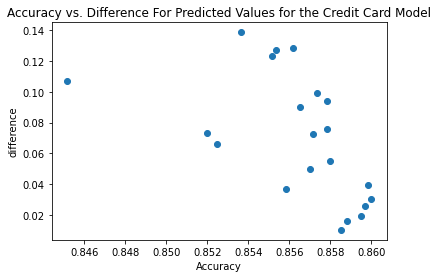

As the accuracy of the model improves, the difference decreases. There are  many duplicated values for both accuracy and difference.


In [94]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Accuracy vs. Difference For Predicted Values for the Credit Card Model")
plt.scatter(scoredAccuracy, fairnessMetrics)
plt.xlabel("Accuracy")
plt.ylabel("difference")
plt.show()
print("As the accuracy of the model improves, the difference decreases. There are  many duplicated values for both accuracy and difference.")

### Part d 

Now calculate the *pareto front*: go over each (accuracy, difference in selection rates) pair and compare it to every other pair. If you find the first pair to have lower accuracy and higher difference in selection rate, discard it.

In [95]:
# begin by merging the accuracy and the difference lists into one 2d list:
twodlst = []

for i,j in zip(scoredAccuracy, fairnessMetrics):
    #print(i,j), this gives each as a pair, accuracy and difference
    twodlst.append((i,j)) 
twodlst
scores = np.array(twodlst)

In [117]:
def identify_pareto(scores):
    #Count items
    population = np.array(scores)
    population = scores.shape[0]
    #Create index for scores 
    population_ids = np.arange(population)
    #items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population, dtype=bool)
    #loop through each item
    for i in range(population):
        for j in range(population):
            #Use inequalities to copmare points i & j
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                pareto_front[i] = 0
                #signal to stop comparing with inequaliities
                break
    #plt.scatter(scores[i], scores[j])
    return population_ids[pareto_front]

frontier = identify_pareto(scores)
type(frontier)
len(frontier)
frontier

array([ 8,  9, 11, 15, 16, 19, 20])

In [113]:
# initialize lists for plotting:
ParetoAccuracy =[]
ParetoMetrics = []

for i in frontier:
    ParetoAccuracy.append(scores[i][0])
    ParetoMetrics.append(scores[i][1])

* Plot the accuracy vs difference in selection rates for all the models the grid search in a scatter plot.
* On the same plot, plot the accuracy vs difference in selection rates for the points on the pareto front. Make these points red.

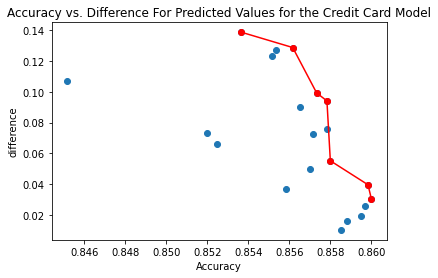

As the accuracy of the model improves, the difference decreases. There are  many duplicated values for both accuracy and difference.


In [116]:
plt.figure()
plt.title("Accuracy vs. Difference For Predicted Values for the Credit Card Model")
plt.scatter(scoredAccuracy, fairnessMetrics)
#plt.scatter(ParetoAccuracy, ParetoMetrics)
plt.plot(ParetoAccuracy, ParetoMetrics, 'o-', color='red')
plt.xlabel("Accuracy")
plt.ylabel("difference")
plt.show()
print("As the accuracy of the model improves, the difference decreases. There are  many duplicated values for both accuracy and difference.")

Which one of these models would you choose to use? Why?

Of the models along the Pareto Front, I would choose the model with the highest accuracy and lowest difference, meaning it is a fair model. There is a single point that combines the best of these two criteria on the bottom right. The solution this point represent has the highest accuracy and lowest difference metric. A lower difference in selection rate means that the model behaves more consistently over time in its predicitons. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Problem 3

This problem builds on ideas from paper 2a in Module 1: “Against prediction: Sentencing, Policing, And Punishing In An Actuarial Age,” Chicago Public Law And Legal Theory Working Paper No. 94, Harcourt, 2005. 

Suppose we have two groups $A$ and $B$ of population sizes $n$ and $9n$. We find that under equal surveillance, group $A$’s offending rate is $2$ offenses per month per person and that of group $B$ is $1$ offense per person per month (See Figure on page 17 of the above paper). Equal surveillance means that out of a total of $10m$ monitors, $m$ monitors are assigned to group $A$ and $9m$ monitors are assigned to group $B$. The surveillance is $\frac{m}{n}$ per capita for both groups. So, under equal surveillance, the combined offending rate over both groups is $11n$ per month. 

Suppose we want to bring down the overall offending rate by increasing the monitors for group $A$. In order to do that we collected some data and found that we could model the rate of decrease in offenses for group $A$ by a function as follows:
	If we increase the per capita surveillance from $\frac{m}{n}$ to $\frac{m}{n} (1 + \delta_A)$, the offending rate declines to $2e^{- \alpha \delta_A}$. ($\alpha>0$)

Similarly, we modeled the rate of increase in offenses for group $B$ by a function under reduced surveillance as follows:
	If we decrease the per capita monitoring rate from $\frac{m}{n}$ to $\frac{m}{n} (1 - \delta_B)$, the offending rate rises to $e^{ \beta \delta_B}$. ($\beta>0$)

How would you distribute the monitors so that 

**a)** Both groups had the same offending rate?

**b)** The combined offending rate was minimized?


Consider 3 different scenarios when $\alpha > \beta$, $\alpha = \beta$, and $\alpha < \beta$. 

**c)** For each of the scenarios, which of the above solutions would you prefer and why?

**TIPS**:
- For **part a** and **part b**, answer by calculating $\delta_A$ and $\delta_B$.
- Try to set up equations from the given information. This problem mostly consists of algebra.
- If you do it correctly, **part c** should makes sense immediately.


Part A:

Distributing monitors so that groups get the same offending rate:


Begin by multiplying the new moitoring rates per capita for both a and b by the size of their populations:

A:
    $\frac{m}{n} (1 + \delta_A)$ $*$ $1$ = $\frac{m}{n} (1 + \delta_A)$

B:
    $\frac{m}{n} (1 - \delta_B)$ $*$ $9$ = $\frac{m}{n} (9 - 9\delta_B)$
    
    
Set the sum of these two terms equal to 10m, the amount of surveillance resources.

$[\frac{m}{n} (1 + \delta_A) *n]$ $+$ $[\frac{m}{n} (9 - 9\delta_B)*9n]$ = $10m$

Begin by simplyfying this set of equations so that like terms are cancelled out, this involves cancelling out m by dividing by m on both sides of the equation and by recognizing that $1/n$ *$n$ = 1.

$(1 + \delta_A)$ $+$ $(9 - 9\delta_B)$ = $10$

This can be re-arranged where $(1 + \delta_A)$ is left alone:

$(1 + \delta_A)$  $=$  $10 - 9$ $+ 9\delta_B$

perform subtraction:

$1 + \delta_A$ $=$   $1$ $+ 9\delta_B$

cancel out the one: (performing subtraction again):

$\delta_A$ $=$ $9\delta_B$


######################################################################

$\delta_A$ is now in terms of $\delta_B$, which is helpful, but $9\delta_B$ will need to be put into $2e^{- \alpha \delta_A}$ to solve the systems of equaitons. This will be performed below.

$2e^{- \alpha \delta_A}$ $=$ $e^{ \beta \delta_B}$

When this is solved, it will yield the value $\delta_B$


$2e^{- \alpha 9\delta_B}$ $=$ $e^{ \beta \delta_B}$


Take the natural log of both sides:

$ln(2) -  \alpha 9\delta_B$  $=$ $\beta \delta_B$


add $\alpha 9\delta_B$ to both sides to get $ln(2)$ alone:


$ln(2)$ $=$  $ \alpha9\delta_B$  $+$  $\beta \delta_B$

divide both sides by $ 9\alpha \beta$ will yield:

$\frac{ln(2)}{\beta + 9\alpha}$ $=$ $\delta_B$

To answer part A, I would assign $\frac{m}{n} (1 + 9( \frac{ln(2)}{\beta +9\alpha}))$ extra cameras per capita for population A, and I would remove $\frac{m}{n} (1 - \frac{ln(2)}{\beta +9\alpha})$ cameras from surveilling population B.

Part B:

Minimizing the total offending rate to something less than 11n. 
The rate each population commits more or less crime dependent on the equations:

$2e^{- \alpha \delta_A}$  $&$ $e^{ \beta \delta_B}$

The derivative in respect to $\delta_B$ can be taken from the sum of these two equations set equal to zero. 

$\delta_B$ $= 0 =$ $\frac{\mathrm{d} \beta}{\mathrm{d}t} $$(2e^{- \alpha \delta_A}$  $+$ $e^{ \beta \delta_B})$


first the RHS of the equation will be simplified so that the derivative can be performed more easily: The goal is to solve for $\delta_B$ so this value will already be substituted in for $\delta_A$.    

$0 =$ $2e^{- \alpha 9\delta_B}$  $+$ $e^{ \beta \delta_B}$ $=$ $\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(2e^{- \alpha 9\delta_B})$ $+$ $\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(e^{ \beta \delta_B})$


for $\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(2e^{- \alpha 9\delta_B}):$ the constant is removed first, the constant in the powers will be moved for simplicity.


$2\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(e^{- 9\alpha \delta_B})$

Next, the chain rule wil be used on the equation,

$ = $ $e^{- 9\alpha \delta_B}$ $\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(- 9\alpha \delta_B)$


$ = $ $2e^{-9\alpha \delta_B}$ $(- 9\alpha \delta_B)$

Multiply these non exponential values and is left with the derivative:

$ = $ $18\alpha e^{-9 \alpha \delta_B}$


Now the derivitive for $e^{ \beta \delta_B}$ is taken in regards to $\delta_B$:

$\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(e^{ \beta \delta_B})$

Applying the chain rule gives:

$ = $ $e^{\beta\delta_B}$ $\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(\beta\delta_B)$

since $\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(\beta\delta_B)$ $= \beta$

derivative will be:

$ = $ $e^{\beta\delta_B}$ $\beta$

Now, the critical point can be found: 

$\frac{\mathrm{d} \beta}{\mathrm{d}t}$ $(\beta\delta_B)$ $= 0 =$ $18\alpha e^{-9 \alpha \delta_B}$ $+$ $e^{\beta\delta_B}$ $\beta$

setting up to find the critical point:

$0 =$ $18\alpha e^{-9 \alpha \delta_B}$ $+$ $e^{\beta\delta_B}$ $\beta$

$18\alpha e^{-9 \alpha \delta_B}$ $=$ $-e\beta^{\beta\delta_B}$ 

Simplify this:

$ln(18\alpha) -9\alpha \delta_B$ = $ln(\beta)+\beta(\delta_B)$

subtract $ln(\beta)$ from both sides

$ln(18\alpha)-ln(\beta) -9\alpha \delta_B$ = $\beta(\delta_B)$

add $\alpha 9\delta_B$ to both sides to the the natural log terms alone:


$ln(18\alpha)-ln(\beta) =$ $9\alpha \delta_B$ $+$ $\beta(\delta_B)$

divide both sides by $ 9\alpha \beta$ will yield:

$\frac{ln(18\alpha)-ln(\beta)}{\beta + 9\alpha}$ $=$ $\delta_B$

So;


To answer part B, I would assign $\frac{m}{n} (1 + 9(\frac{ln(18\alpha)-ln(\beta)}{\beta + 9\alpha}))$ extra cameras per capita for population A, and I would remove $\frac{m}{n} (1 - \frac{ln(18\alpha)-ln(\beta)}{\beta + 9\alpha})$ cameras from surveilling population B. 

Part C:

It is immediatly clear that part B yields a better solution by allowing the descision makers to remove more surveillance from population B and allocate more surveillance to population A. Overall, this reduces the total crime rate by even more than distribution the cameras so that each groups had equal offending rates. Since group A has a higher offending rate, it is more useful to dedicate more surveillance to this population than the group B which commits less crimes in order to find the smallest total offence rate. Group A will have more surveillance than group B per capita, but not in total. 



In [101]:
print("end of HW3")
print("Jack Holbrook, CMPSC190DD, Proffessor Singh")

end of HW3
Jack Holbrook, CMPSC190DD, Proffessor Singh
